In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## Linear Algebra


In [38]:
## Vector

v =np.array([2,3,4])
p =np.array([2,5,4])

dot_vp = np.dot(v,p)
print(dot_vp)

35


In [39]:
v1 =np.array([[2,3,4],
            [2,5,4]])
        
print(v1.size)

print(v1[:,:-1])



6
[[2 3]
 [2 5]]


In [40]:
## matrix multiplication

v1 =np.array([[2,3,4],
            [2,5,4]])

v2 =np.array([[2,0,4],
            [2,2,2],
            [2,2,2]])

c =v1.dot(v2)

print(c)

print(v1.shape, v2.shape, c.shape)

[[18 14 22]
 [22 18 26]]
(2, 3) (3, 3) (2, 3)


In [41]:
v1 =np.array([[2,3,4],
            [2,5,4]])

v2 =np.array([[2],
            [2],
            [2]])

c =v1.dot(v2)

print(c)

print(v1.shape, v2.shape, "-->", c.shape)

[[18]
 [22]]
(2, 3) (3, 1) --> (2, 1)


In [42]:
v1_T =v1.T
print(v1_T)
print(v1_T.shape)

[[2 2]
 [3 5]
 [4 4]]
(3, 2)


In [ ]:
sq_matrix = np.array([[13,12,4],
                      [2,10, 5],
                      [3,5, 0]])
det_sm = np.linalg.det(sq_matrix)
print(det_sm)

-225.0


In [158]:
rand_sq_matrix = np.random.randint(0, 4,(3,3))
print(rand_sq_matrix)

[[0 2 3]
 [2 2 0]
 [1 2 3]]


In [ ]:
## Inverse of a matrix
## (adjoint of a matrix)/det of the matrix
## cofactor transpose of a matrix is adjoint of a matrix


In [ ]:


print("**"*24)

inverse_matrix=np.linalg.inv(rand_sq_matrix)

print("direct inverse calculation\n", np.linalg.inv(rand_sq_matrix))

************************************************
direct inverse calculation
 [[-1.          0.          1.        ]
 [ 1.          0.5        -1.        ]
 [-0.33333333 -0.33333333  0.66666667]]


In [167]:
## element print of the inverse matrix
for i in inverse_matrix.T:
    for j in i:
        print(j)

-1.0
1.0
-0.3333333333333333
0.0
0.5
-0.3333333333333333
1.0
-1.0
0.6666666666666666


In [169]:
rank = np.linalg.matrix_rank(inverse_matrix)
print(rank)

3


In [182]:
eigvals, eigvecs = np.linalg.eig(rand_sq_matrix)
print(eigvals,'\n', "**"*5,'\n',eigvecs)

[ 4.95758699 -1.07911886  1.12153188] 
 ********** 
 [[ 0.58707931  0.83704046  0.32006576]
 [ 0.39699884 -0.54368831 -0.72869067]
 [ 0.70549968  0.06137015  0.60544844]]


## Signal generation

(100,)
(100,)


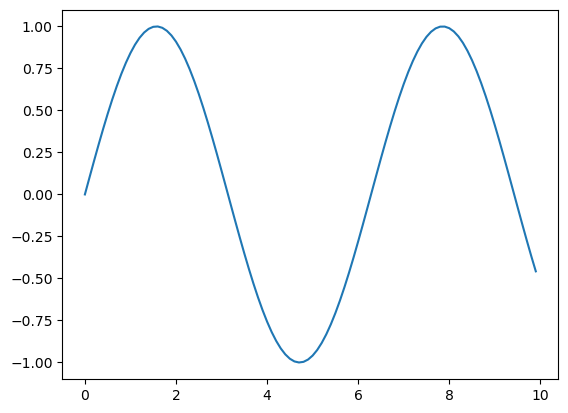

In [201]:
input = np.arange(0, 10, 0.1)
print(input.shape)

output = np.sin(input)

plt.plot(input,output)
print(output.shape)

In [200]:
noise = np.random.randn(100)
noise.shape

(100,)